In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
pd.set_option('display.max_columns', None)

In [65]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [66]:
df.shape

(3504, 18)

In [67]:
df.head()

,society,price,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,2053.0,4,5,3+,10.0,New Property,flat,3333.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,750.0,2,2,3,0.0,Relatively New,flat,1281.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5,5,3+,4.0,Relatively New,house,5580.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,627.0,2,2,2,3.0,Relatively New,flat,850.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,4,4,3+,27.0,New Property,house,3950.0,0,0,0,0,0,1,61


In [68]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [69]:
train_df.head()

,price,sector,bedRoom,bathroom,balcony,floorNum,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,6.00,sector 22,4,5,3+,10.0,New Property,flat,3333.0,0,1,0,1,0,2,49
1,1.00,sector 107,2,2,3,0.0,Relatively New,flat,1281.0,1,0,0,0,0,1,29
2,9.25,sector 57,5,5,3+,4.0,Relatively New,house,5580.0,1,1,1,1,0,2,160
3,0.07,sector 83,2,2,2,3.0,Relatively New,flat,850.0,1,0,0,1,0,2,165
4,8.50,sector 63,4,4,3+,27.0,New Property,house,3950.0,0,0,0,0,0,1,61


In [70]:
train_df.shape

(3504, 16)

#### luxury_score

<Axes: xlabel='luxury_score'>

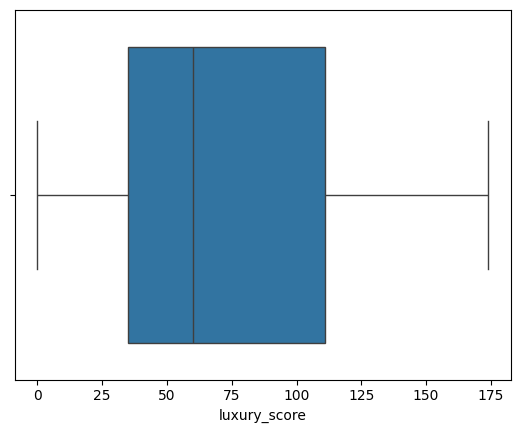

In [71]:
sns.boxplot(x=df['luxury_score'])

In [72]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return 'Low'
    elif 50 <= score < 150:
        return 'Medium'
    elif 1500 <= score <=175:
        return 'High'
    else:
        return None # or "Undefined" or any other label for scores outside the defined bins

In [73]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [74]:
train_df.head()

,price,sector,bedRoom,bathroom,balcony,floorNum,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,6.00,sector 22,4,5,3+,10.0,New Property,flat,3333.0,0,1,0,1,0,2,49,Low
1,1.00,sector 107,2,2,3,0.0,Relatively New,flat,1281.0,1,0,0,0,0,1,29,Low
2,9.25,sector 57,5,5,3+,4.0,Relatively New,house,5580.0,1,1,1,1,0,2,160,None
3,0.07,sector 83,2,2,2,3.0,Relatively New,flat,850.0,1,0,0,1,0,2,165,None
4,8.50,sector 63,4,4,3+,27.0,New Property,house,3950.0,0,0,0,0,0,1,61,Medium


#### floorNum

<Axes: xlabel='floorNum'>

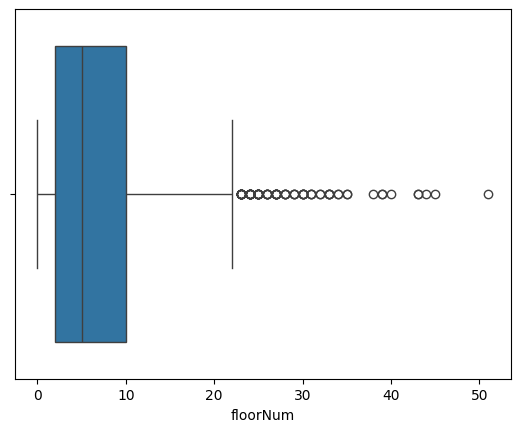

In [75]:
sns.boxplot(x=df['floorNum'])

In [76]:
def categorize_floor(floor):
    if 0 <=floor<=2:
        return 'Low Floor'
    elif 3<= floor <=10:
        return 'Mid Floor'
    elif 11<= floor <=51:
        return 'High Floor'
    else:
        return None

In [77]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [78]:
train_df.head()

,price,sector,bedRoom,bathroom,balcony,floorNum,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,6.00,sector 22,4,5,3+,10.0,New Property,flat,3333.0,0,1,0,1,0,2,49,Low,Mid Floor
1,1.00,sector 107,2,2,3,0.0,Relatively New,flat,1281.0,1,0,0,0,0,1,29,Low,Low Floor
2,9.25,sector 57,5,5,3+,4.0,Relatively New,house,5580.0,1,1,1,1,0,2,160,None,Mid Floor
3,0.07,sector 83,2,2,2,3.0,Relatively New,flat,850.0,1,0,0,1,0,2,165,None,Mid Floor
4,8.50,sector 63,4,4,3+,27.0,New Property,house,3950.0,0,0,0,0,0,1,61,Medium,High Floor


In [79]:
train_df.drop(columns=['floorNum','luxury_score'], inplace=True)

In [80]:
train_df.head()

,price,sector,bedRoom,bathroom,balcony,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,6.00,sector 22,4,5,3+,New Property,flat,3333.0,0,1,0,1,0,2,Low,Mid Floor
1,1.00,sector 107,2,2,3,Relatively New,flat,1281.0,1,0,0,0,0,1,Low,Low Floor
2,9.25,sector 57,5,5,3+,Relatively New,house,5580.0,1,1,1,1,0,2,None,Mid Floor
3,0.07,sector 83,2,2,2,Relatively New,flat,850.0,1,0,0,1,0,2,None,Mid Floor
4,8.50,sector 63,4,4,3+,New Property,house,3950.0,0,0,0,0,0,1,Medium,High Floor


In [81]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
Y_label = data_label_encoded['price']

[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sec

In [82]:
X_label

,sector,bedRoom,bathroom,balcony,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,27.0,4,5,4.0,1.0,0.0,3333.0,0,1,0,1,0,2,0.0,2.0
1,9.0,2,2,3.0,3.0,0.0,1281.0,1,0,0,0,0,1,0.0,1.0
2,64.0,5,5,4.0,3.0,1.0,5580.0,1,1,1,1,0,2,2.0,2.0
3,95.0,2,2,2.0,3.0,0.0,850.0,1,0,0,1,0,2,2.0,2.0
4,71.0,4,4,4.0,1.0,1.0,3950.0,0,0,0,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,105.0,3,3,2.0,4.0,0.0,140.0,0,0,0,0,0,1,0.0,0.0
3500,74.0,3,4,2.0,3.0,0.0,1800.0,0,1,0,0,0,2,2.0,0.0
3501,63.0,3,3,3.0,0.0,0.0,1738.0,1,0,0,0,0,2,1.0,2.0
3502,97.0,3,4,3.0,3.0,0.0,2026.0,0,0,0,1,0,1,2.0,2.0


In [83]:
Y_label

0       6.00
1       1.00
2       9.25
3       0.07
4       8.50
        ... 
3499    0.07
3500    2.00
3501    1.00
3502    1.00
3503    1.00
Name: price, Length: 3504, dtype: float64

#### Technique 1 - Correlation Analysis

<Axes: >

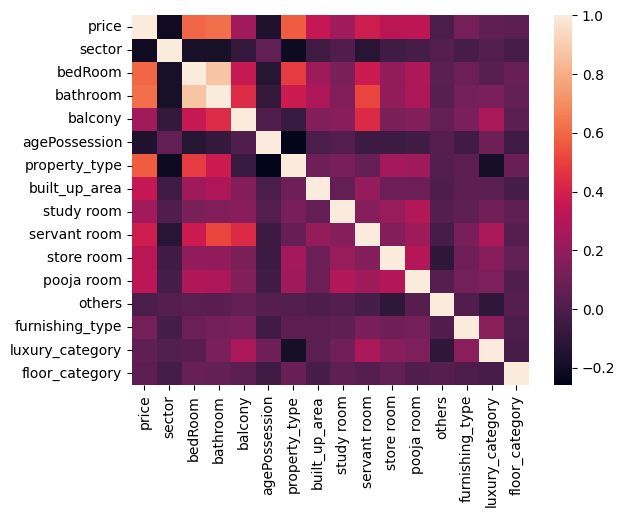

In [84]:
sns.heatmap(data_label_encoded.corr())

In [85]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.206092
1,bedRoom,0.596446
2,bathroom,0.620390
3,balcony,0.246287
4,agePossession,-0.150993
5,property_type,0.570978
6,built_up_area,0.347846
7,study room,0.244093
8,servant room,0.378609
9,store room,0.318435


#### Technique 2 - Random Forest Feature Importance

In [86]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, Y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.598686
5,property_type,0.171640
0,sector,0.089660
2,bathroom,0.028412
8,servant room,0.021680
1,bedRoom,0.017537
4,agePossession,0.014163
3,balcony,0.013093
12,furnishing_type,0.008629
7,study room,0.007708


#### Technique 3 - Gradient Boosting Feature Importances

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest Regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, Y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance':gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.626279
5,property_type,0.174849
0,sector,0.071513
1,bedRoom,0.048624
2,bathroom,0.027006
8,servant room,0.025236
4,agePossession,0.008040
9,store room,0.007994
3,balcony,0.004606
12,furnishing_type,0.002238


#### Technique 4 - Permutation Importance

In [88]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train_label, x_test_label, y_train_label, y_test_label = train_test_split(X_label, Y_label, test_size=0.2, random_state=42)

# Train a Random Forest Regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, x_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.651718
5,property_type,0.358107
0,sector,0.112862
8,servant room,0.009458
3,balcony,0.009351
1,bedRoom,0.005180
14,floor_category,0.001867
13,luxury_category,0.001615
11,others,0.001355
2,bathroom,0.000777


Technique 5 - LASSO

In [89]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, Y_label) 

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff':lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
5,property_type,1.069175
2,bathroom,0.926369
6,built_up_area,0.495768
8,servant room,0.262835
9,store room,0.248913
7,study room,0.232757
10,pooja room,0.134749
3,balcony,0.058768
12,furnishing_type,0.052285
13,luxury_category,0.007645


#### Technique 6 - RFE

In [90]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, Y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.602499
5,property_type,0.169249
0,sector,0.090543
2,bathroom,0.027689
8,servant room,0.020659
1,bedRoom,0.019140
4,agePossession,0.012915
3,balcony,0.010810
7,study room,0.008496
12,furnishing_type,0.008480


#### Technique 7 - Linear Regression Weights

In [92]:
# Train a linear regression model on the label-encoded and stadardized training data 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, Y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature':X_label.columns,
    'reg_coeffs':lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
5,property_type,1.078316
2,bathroom,0.936497
6,built_up_area,0.502463
8,servant room,0.262125
9,store room,0.250934
7,study room,0.239219
10,pooja room,0.138029
3,balcony,0.065624
12,furnishing_type,0.058389
13,luxury_category,0.013714


#### Technique 8 - SHAP

In [93]:
!pip3 install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 2.7 MB/s eta 0:00:0000:0100:01


In [94]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, Y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


array([[ 0.30654461,  0.05431772,  0.12682682, ...,  0.1680428 ,
         0.02335978, -0.02308257],
       [-0.10993908, -0.08058985, -0.11031832, ...,  0.01464204,
         0.00814302,  0.01665293],
       [ 0.25882465,  0.16198753, -0.17344036, ..., -0.04290189,
         0.14503788,  0.02643151],
       ...,
       [ 0.18638826,  0.00409   ,  0.06573861, ...,  0.00210611,
        -0.01007991, -0.02966492],
       [-0.46807196, -0.019038  ,  0.04971397, ..., -0.02062503,
         0.09606945, -0.01260705],
       [-0.16429668,  0.01112082, -0.11701682, ..., -0.01196031,
         0.00897831,  0.00290634]])

In [95]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score':np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score',ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.265881
5,property_type,0.706849
0,sector,0.343771
2,bathroom,0.130956
8,servant room,0.093549
1,bedRoom,0.044286
3,balcony,0.035619
4,agePossession,0.031109
12,furnishing_type,0.028612
14,floor_category,0.024697


In [96]:
final_fi_df = fi_df1.merge(fi_df2, on='feature').merge(fi_df3, on='feature').merge(fi_df4, on='feature').merge(fi_df5, on='feature').merge(fi_df6, on='feature').merge(fi_df7, on='feature').merge(fi_df8, on='feature').set_index('feature')

In [97]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.206092,0.089660,0.071513,0.112862,-0.106408,0.090543,-0.113763,0.343771
bedRoom,0.596446,0.017537,0.048624,0.005180,0.000000,0.019140,-0.014808,0.044286
bathroom,0.620390,0.028412,0.027006,0.000777,0.926369,0.027689,0.936497,0.130956
balcony,0.246287,0.013093,0.004606,0.009351,0.058768,0.010810,0.065624,0.035619
agePossession,-0.150993,0.014163,0.008040,-0.003427,-0.025520,0.012915,-0.034279,0.031109
property_type,0.570978,0.171640,0.174849,0.358107,1.069175,0.169249,1.078316,0.706849
built_up_area,0.347846,0.598686,0.626279,0.651718,0.495768,0.602499,0.502463,1.265881
study room,0.244093,0.007708,0.001726,-0.000595,0.232757,0.008496,0.239219,0.023147
servant room,0.378609,0.021680,0.025236,0.009458,0.262835,0.020659,0.262125,0.093549


In [98]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [99]:
final_fi_df[['rf_importance', 'gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.570103
property_type      0.216387
sector             0.094726
bathroom           0.026166
servant room       0.021886
bedRoom            0.021145
balcony            0.009892
agePossession      0.008661
furnishing_type    0.005886
store room         0.005414
study room         0.005145
luxury_category    0.004692
floor_category     0.004496
pooja room         0.003352
others             0.002050
dtype: float64

In [100]:
# to drop pooja room, study room, and others
X_label

,sector,bedRoom,bathroom,balcony,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,27.0,4,5,4.0,1.0,0.0,3333.0,0,1,0,1,0,2,0.0,2.0
1,9.0,2,2,3.0,3.0,0.0,1281.0,1,0,0,0,0,1,0.0,1.0
2,64.0,5,5,4.0,3.0,1.0,5580.0,1,1,1,1,0,2,2.0,2.0
3,95.0,2,2,2.0,3.0,0.0,850.0,1,0,0,1,0,2,2.0,2.0
4,71.0,4,4,4.0,1.0,1.0,3950.0,0,0,0,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,105.0,3,3,2.0,4.0,0.0,140.0,0,0,0,0,0,1,0.0,0.0
3500,74.0,3,4,2.0,3.0,0.0,1800.0,0,1,0,0,0,2,2.0,0.0
3501,63.0,3,3,3.0,0.0,0.0,1738.0,1,0,0,0,0,2,1.0,2.0
3502,97.0,3,4,3.0,3.0,0.0,2026.0,0,0,0,1,0,1,2.0,2.0


In [101]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, Y_label, cv=5, scoring='r2')

In [102]:
scores.mean()

0.8080712371070409

In [103]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf,X_label.drop(columns=['pooja room','study room','others']), Y_label, cv=5, scoring='r2')

In [104]:
scores.mean()

0.8077592185485901

In [105]:
export_df = X_label.drop(columns=['pooja room','study room','others'])
export_df['price'] = Y_label

In [106]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [107]:
export_df

,sector,bedRoom,bathroom,balcony,agePossession,property_type,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,27.0,4,5,4.0,1.0,0.0,3333.0,1,0,2,0.0,2.0,6.00
1,9.0,2,2,3.0,3.0,0.0,1281.0,0,0,1,0.0,1.0,1.00
2,64.0,5,5,4.0,3.0,1.0,5580.0,1,1,2,2.0,2.0,9.25
3,95.0,2,2,2.0,3.0,0.0,850.0,0,0,2,2.0,2.0,0.07
4,71.0,4,4,4.0,1.0,1.0,3950.0,0,0,1,1.0,0.0,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,105.0,3,3,2.0,4.0,0.0,140.0,0,0,1,0.0,0.0,0.07
3500,74.0,3,4,2.0,3.0,0.0,1800.0,1,0,2,2.0,0.0,2.00
3501,63.0,3,3,3.0,0.0,0.0,1738.0,0,0,2,1.0,2.0,1.00
3502,97.0,3,4,3.0,3.0,0.0,2026.0,0,0,1,2.0,2.0,1.00
